In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
load_boston = load_boston()
X = load_boston.data
y = load_boston.target

data = pd.DataFrame(X, columns=load_boston.feature_names)
data["SalePrice"] = y #sale price
data.head()

/Users/aharo/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
print(load_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print(data.shape)

(506, 14)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  SalePrice  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


EDA NOW

In [7]:
data.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
SalePrice    0
dtype: int64

plot using sns ~ seabron

<module 'matplotlib.tight_layout' from '/Users/aharo/opt/anaconda3/lib/python3.9/site-packages/matplotlib/tight_layout.py'>

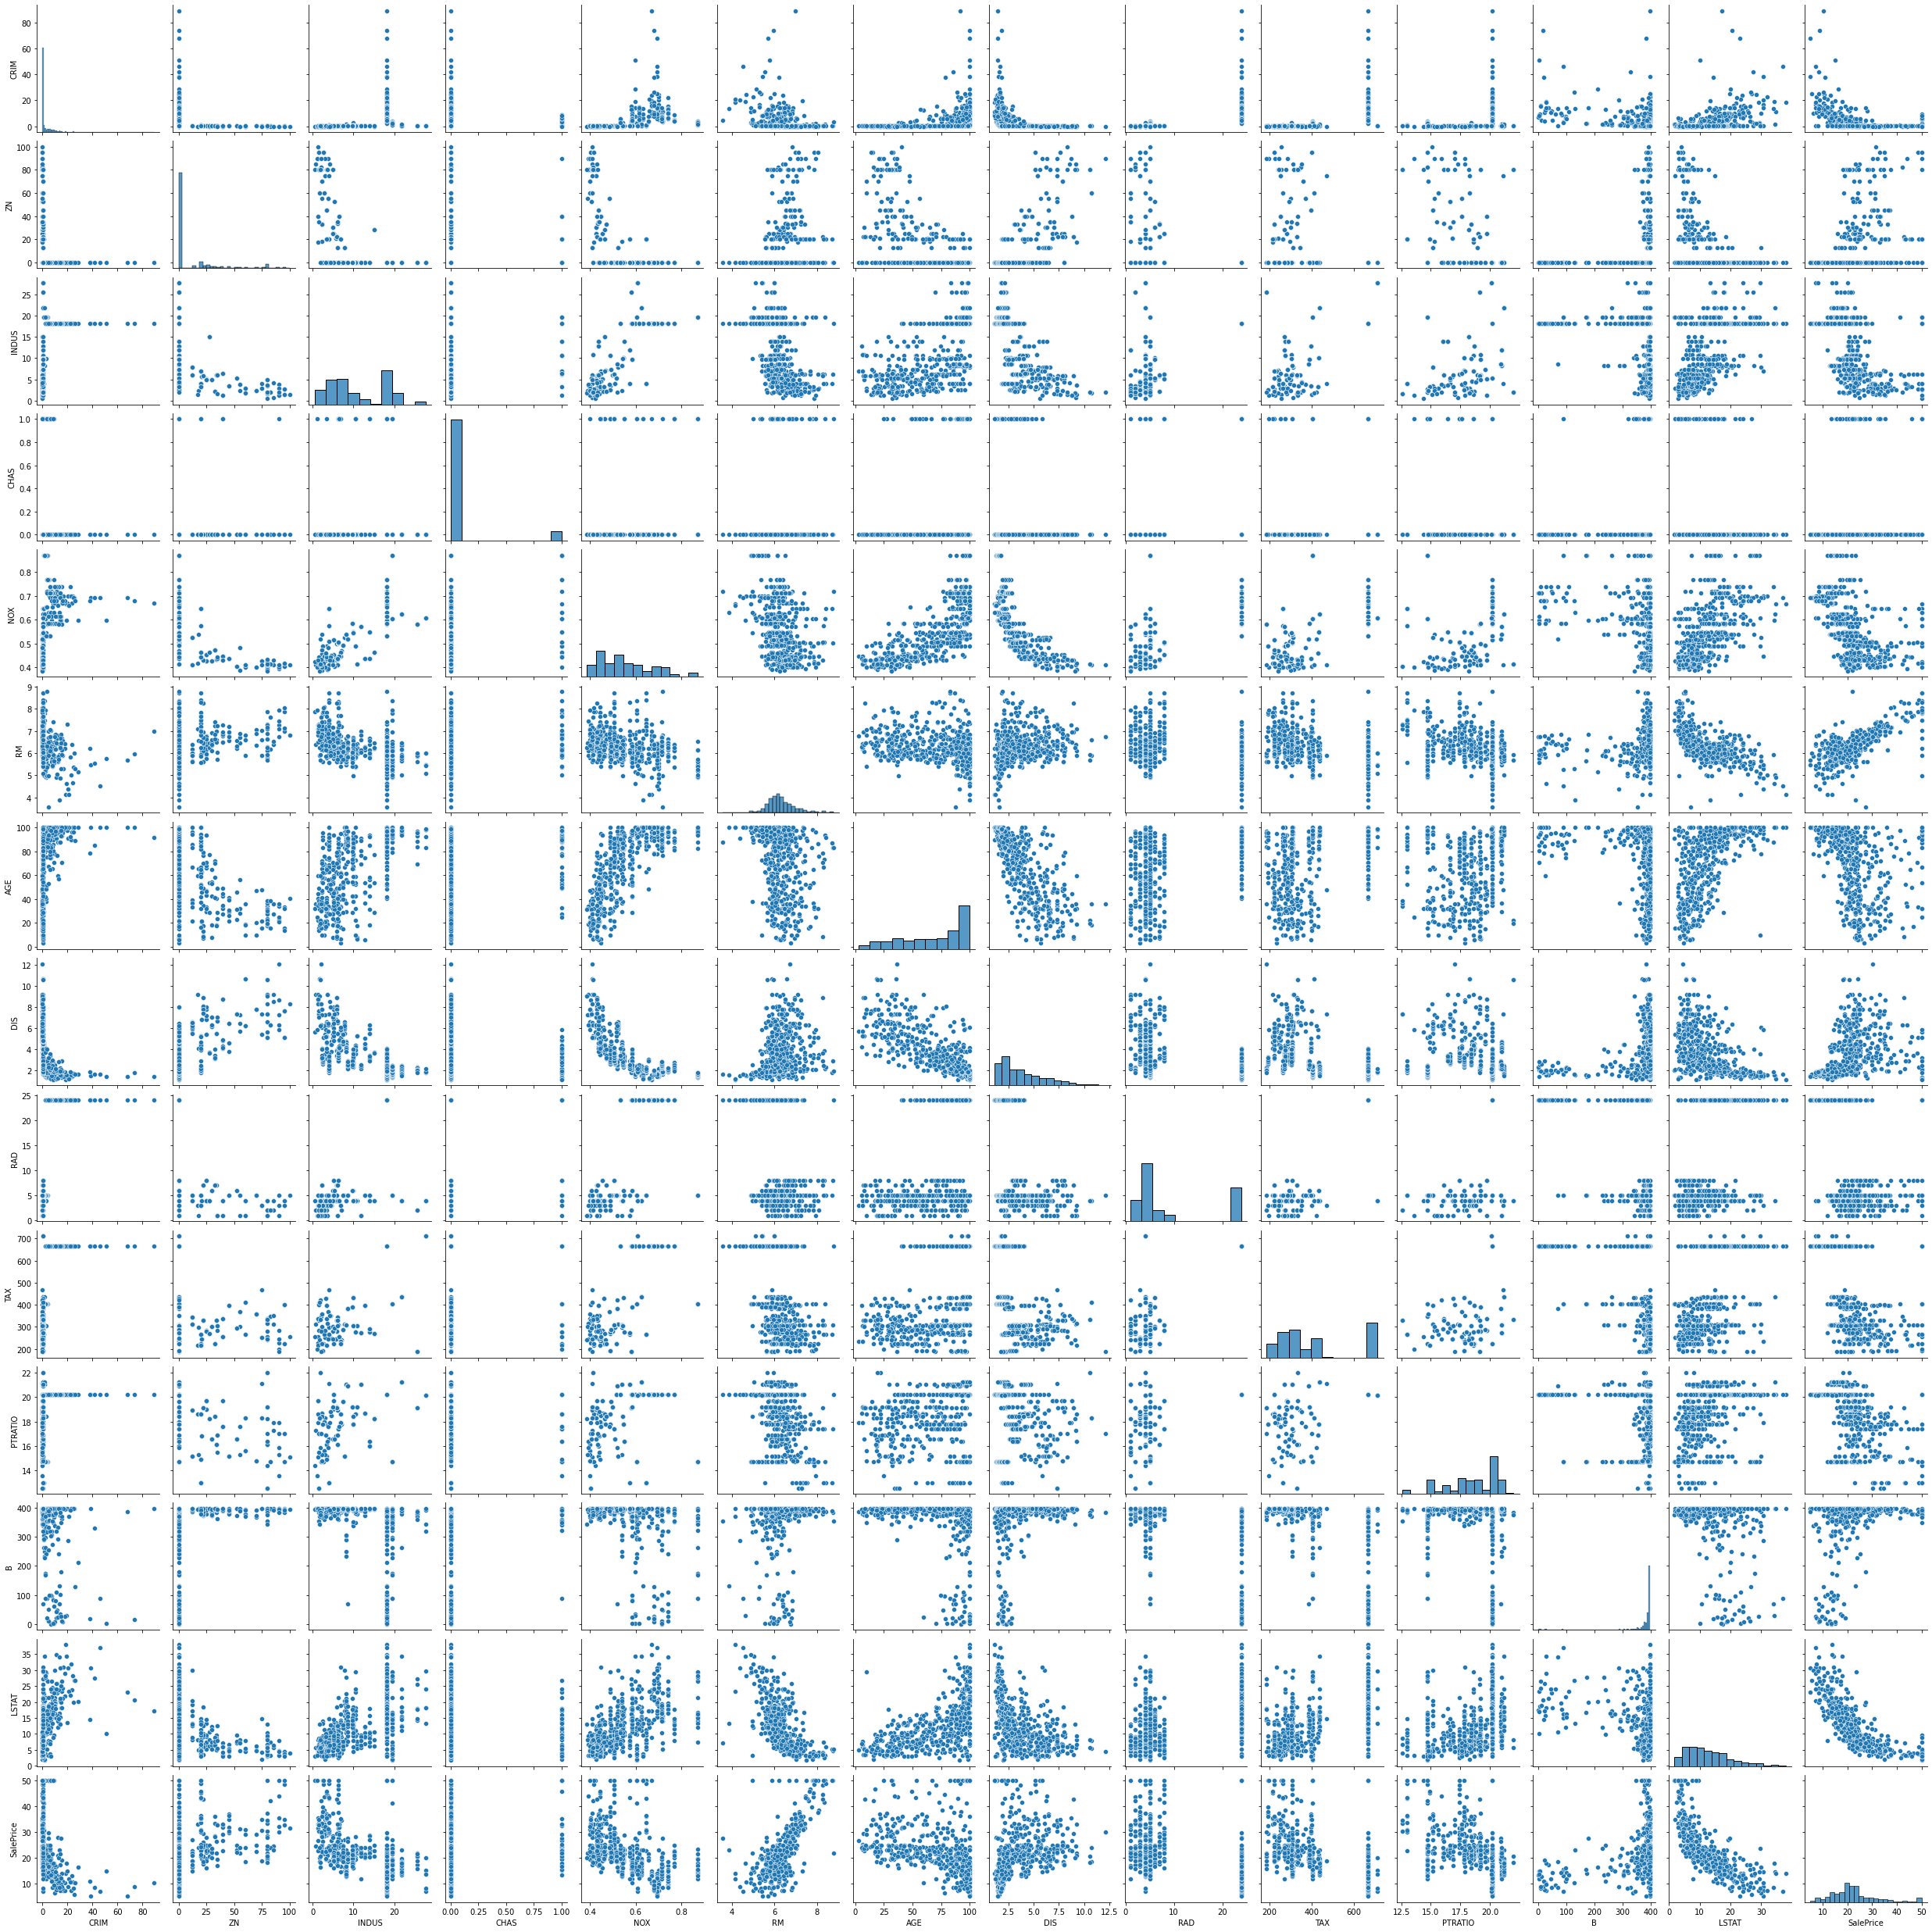

In [8]:
sns.pairplot(data, height = 2.5)
plt.tight_layout

/Users/aharo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

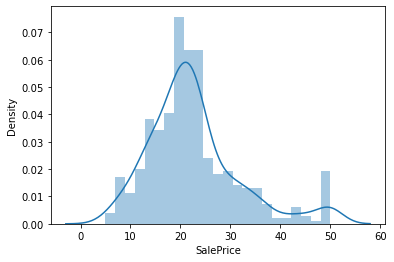

In [9]:
sns.distplot(data['SalePrice']) # our Target/Delta

- Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

- Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. 

In [10]:
print("Skewness: %f" %data['SalePrice'].skew() )

Skewness: 1.108098


In [11]:
print("Kurtosis: %f" %data['SalePrice'].kurt() )

Kurtosis: 1.495197


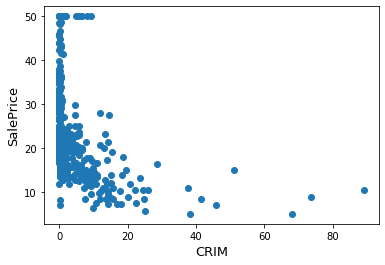

In [12]:
import matplotlib.pyplot as plt #fixError .pylot as plt

graph, ax = plt.subplots() #error here with subplots()
ax.scatter(x = data['CRIM'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize = 13)
plt.xlabel('CRIM', fontsize = 13)
plt.show()

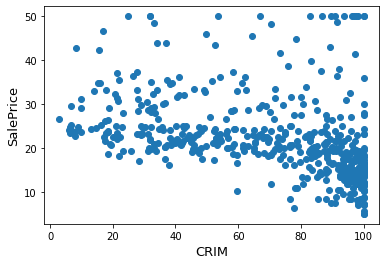

In [13]:
graph, ax = plt.subplots()
ax.scatter( x = data['AGE']  ,  y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('CRIM', fontsize=13)
plt.show()





/Users/aharo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


 mu:  22.53 
 sigma:  9.19


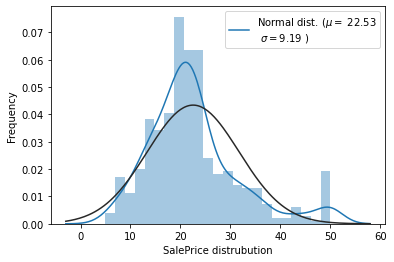

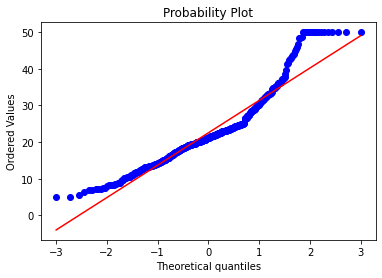

In [14]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(data['SalePrice'],   fit=norm)#????

(mu, sigma ) = norm.fit( data['SalePrice'])
#print(f"\n mu: {mu} \n sigma: {sigma}")
print(' mu: {: .2f} \n sigma: {: .2f}'.format(mu,sigma) )

plt.legend( [ 'Normal dist. ($\mu=$ {:.2f}\n $\sigma=${:.2f} )'.format(mu,sigma)], loc = 'best')

plt.ylabel('Frequency')
plt.xlabel('SalePrice distrubution')

#Get also QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot = plt )
plt.show()



 mu: 3.09
 sigma: 0.39


/Users/aharo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


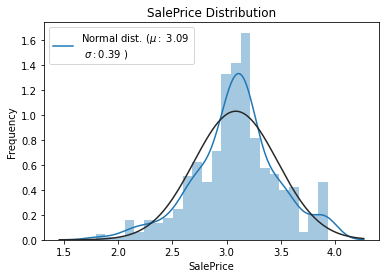

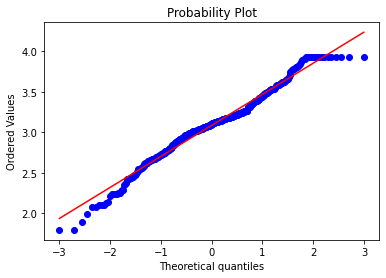

In [15]:
data['SalePrice'] = np.log1p(data['SalePrice'])
sns.distplot(data['SalePrice'], fit = norm)#???

(mu, sigma) = norm.fit(data['SalePrice'])
print(' mu: {:.2f}\n sigma: {:.2f}'.format(mu,sigma))

plt.legend(['Normal dist. ($\mu:$ {:.2f} \n $\sigma:${:.2f} )'.format(mu,sigma)])
plt.ylabel("Frequency")
plt.title('SalePrice Distribution')

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot = plt)
plt.show()



DATA CORRELATION

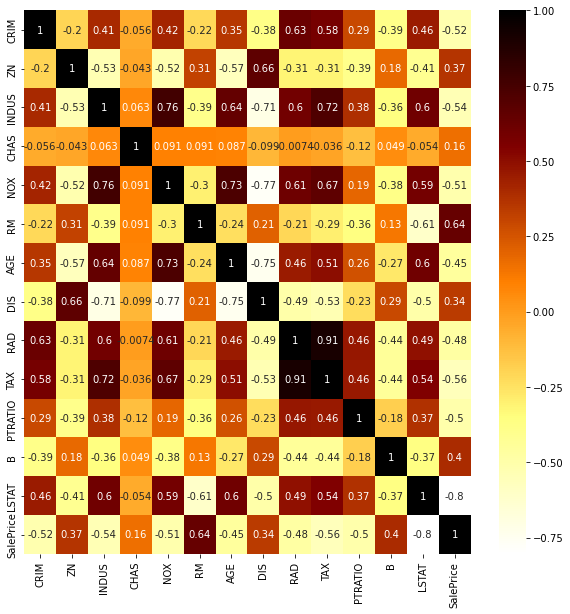

In [16]:
# data comes from Pandas as pd --> cor == pd
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True , cmap=plt.cm.afmhot_r)#cmap=plt.cm.(allows you to choose color)
plt.show()

In [17]:
cor_target = abs(cor['SalePrice']) # ABS of the correlation
relevant_ft = cor_target[cor_target>0.2] # highly correlated Ft.

names = [index for index, value in relevant_ft.iteritems()] #getting the names of the features
names.remove('SalePrice') #Remove the target ft.
print(names)
print(len(names))


['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
12


MODEL BUILDING 

In [18]:
from sklearn.model_selection import train_test_split
X = data.drop('SalePrice', axis = 1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random_state means that the state becomes static

In [19]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [20]:
from sklearn.linear_model import LinearRegression

linearReg = LinearRegression()
linearReg.fit(X_train,y_train)

LinearRegression()

In [21]:
preductions = linearReg.predict(X_test) #now we can predict

print("Actual value of house: ", y_test[0])
print("Model Predict value: ",preductions[0])

Actual value of house:  3.2188758248682006
Model Predict value:  3.3668949799969625


In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, preductions) # mean square error
rmse = np.sqrt(mse); # (root) mean square error

print(rmse)

0.18795843289241626


In [1]:
print("Hello Angel")

Hello Angel
